## Final Project Submission

Please fill out:
* Student name: Group 5 - 
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:

**Business Understanding**

To develop a predictive model that accurately estimates the sale price of houses in King County, Washington, based on various features such as the number of bedrooms, bathrooms, square footage, location attributes (like waterfront proximity), house condition, grade, year built and renovated. This model aims to assist potential buyers, sellers, and real estate stakeholders in understanding and predicting house prices within the region.

**Importing Dependancies**

In [1]:
import itertools
import numpy as np
import pandas as pd 
from numbers import Number
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pickle

import warnings
warnings.filterwarnings('ignore')

***Data Understanding***

In [2]:
# Load the dataset
house_data = pd.read_csv("data/kc_house_data.csv")

In [3]:
# structure of dataset
house_data.shape

(21597, 21)

In [4]:
# Get information about the dataset, including data types and missing values
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
# Summary statistics of numerical columns
house_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
sqft_above,21597.0,1.788597e+03,8.277598e+02,3.700000e+02,1.190000e+03,1.560000e+03,2.210000e+03,9.410000e+03
yr_built,21597.0,1.971000e+03,2.937523e+01,1.900000e+03,1.951000e+03,1.975000e+03,1.997000e+03,2.015000e+03
yr_renovated,17755.0,8.363678e+01,3.999464e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.015000e+03


## Data Preparation

In [6]:
#check for duplicate values
house_data.duplicated().sum()

0

In [7]:
# Check for missing values in the dataset
house_data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
# fill null values in waterfront column with the mode
house_data['waterfront'].fillna(house_data['waterfront'].mode()[0], inplace=True)

# Convert 'yr_renovated' column from float to integer, handling NaN values
house_data['yr_renovated'] = house_data['yr_renovated'].fillna(0).astype(int)

# Filling missing values for 'yr_renovated' with 0
house_data['yr_renovated'].fillna(house_data['yr_renovated'].median(), inplace=True)

## Visualizations

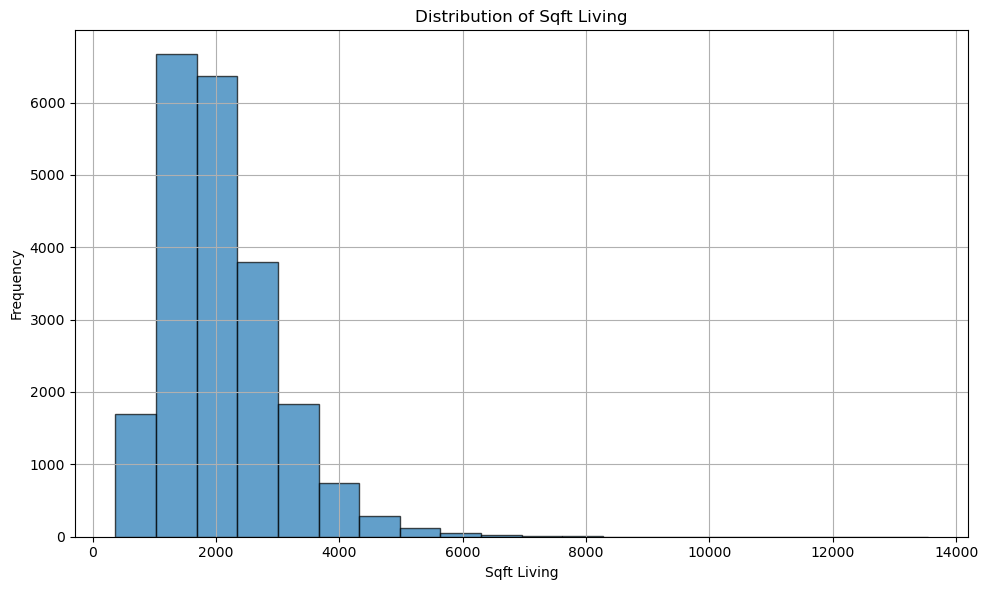

In [9]:
sqft_living = house_data["sqft_living"]

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(sqft_living, bins=20, edgecolor="black", alpha=0.7)
plt.xlabel("Sqft Living")
plt.ylabel("Frequency")
plt.title("Distribution of Sqft Living")

plt.grid(True)
plt.tight_layout()

plt.show()

It shows a positive skew, meaning that while most homes fall within a smaller square footage range, there are a few homes with exceptionally large square footage. These larger values, though fewer, extend the tail of the distribution to the right, indicating a positive skew. This suggests that while the majority of homes are smaller, there are a few larger homes that are exceptions.

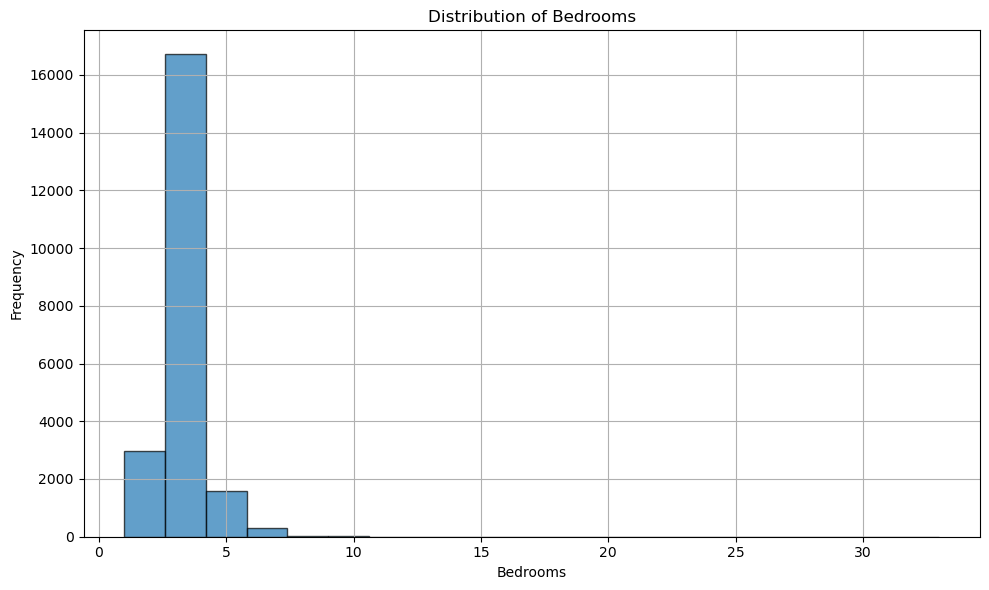

In [10]:
bedrooms = house_data['bedrooms']

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(bedrooms, bins=20, edgecolor="black", alpha=0.7)
plt.xlabel("Bedrooms")
plt.ylabel("Frequency")
plt.title("Distribution of Bedrooms")

plt.grid(True)
plt.tight_layout()

plt.show()

There is a significant peak at 2 to 3 bedrooms, indicating that most homes have this number of bedrooms.

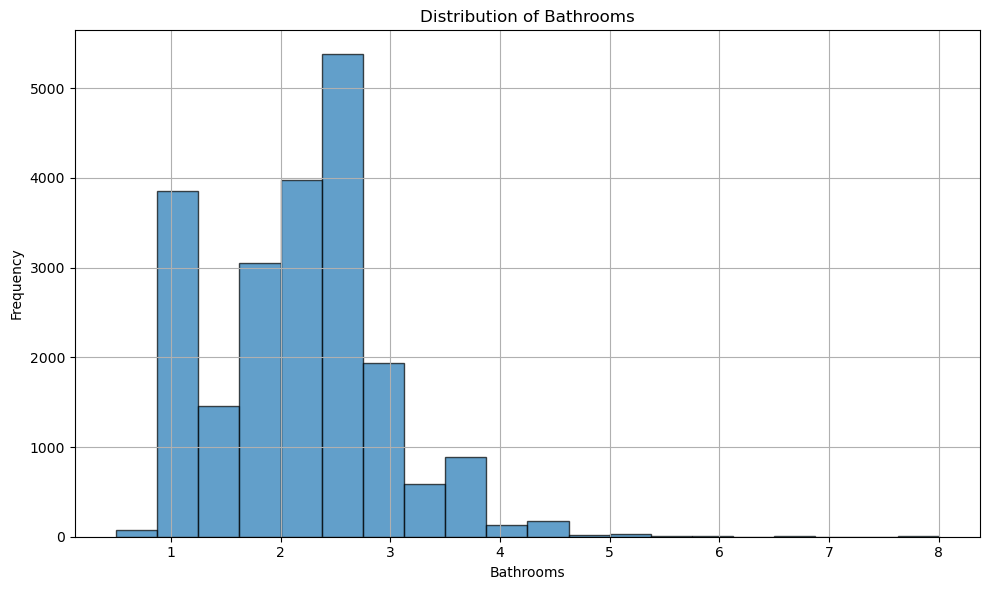

In [11]:
#checking the distribution of number of bathrooms

bathrooms = house_data['bathrooms']

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(bathrooms, bins=20, edgecolor="black", alpha=0.7)
plt.xlabel("Bathrooms")
plt.ylabel("Frequency")
plt.title("Distribution of Bathrooms")

plt.grid(True)
plt.tight_layout()

plt.show()

Most Common: Houses with 3 bathrooms have the highest frequency.

Lower Frequencies: Counts beyond 4 bathrooms have much lower frequencies, suggesting they are less common.

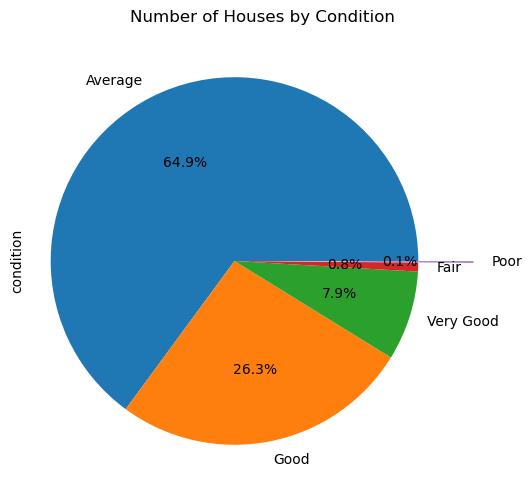

In [12]:
# Pie chart to show number of houses by condition
house_counts = house_data['condition'].value_counts()
plt.figure(figsize=(6, 6))
explode = (0, 0, 0, 0, 0.3)
house_counts.plot(kind='pie', autopct="%1.1f%%", explode=explode, title="Number of Houses by Condition")
plt.axis('equal')
plt.show()

Most of the houses are in average to good condition.

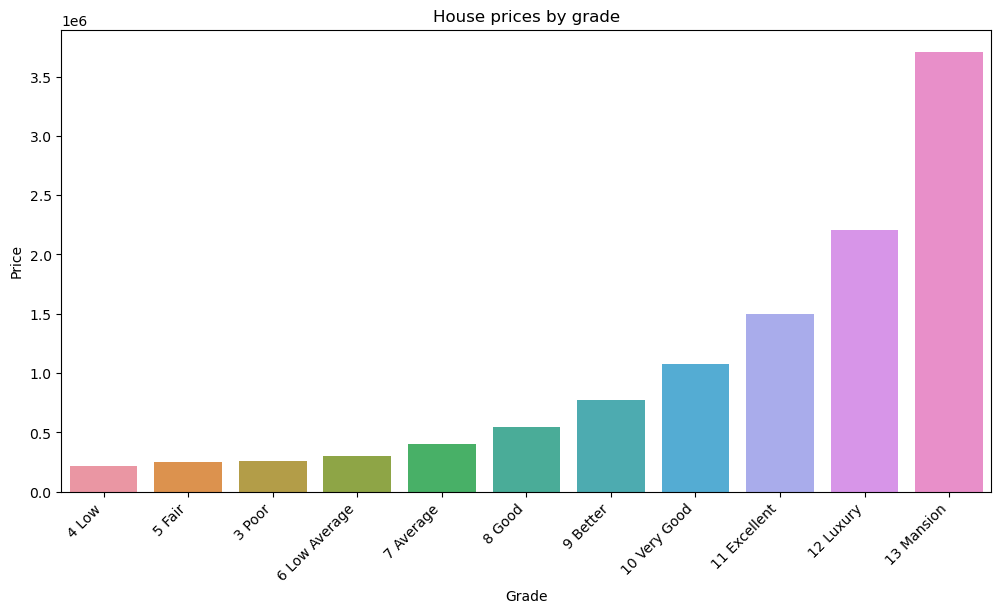

In [13]:
# Distribution of houses by grade
ave_prices = house_data[['grade', 'price']].groupby('grade').mean().sort_values(by='price').reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='grade', y='price', data=ave_prices, label='Price')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Grade")
plt.ylabel("Price")
plt.title('House prices by grade')
plt.show()


Houses under average 

## Feature Engineering

In [14]:
# Explore specific columns related to the features mentioned in the business understanding
relevant_columns = ['date','price', 'bedrooms', 'bathrooms', 'floors', 'sqft_living','sqft_lot', 
                    'waterfront', 'condition', 'grade', 'yr_built', 'yr_renovated']
relevant_data = house_data[relevant_columns]
relevant_data

,date,price,bedrooms,bathrooms,floors,sqft_living,sqft_lot,waterfront,condition,grade,yr_built,yr_renovated
0,10/13/2014,221900.0,3,1.00,1.0,1180,5650,NO,Average,7 Average,1955,0
1,12/9/2014,538000.0,3,2.25,2.0,2570,7242,NO,Average,7 Average,1951,1991
2,2/25/2015,180000.0,2,1.00,1.0,770,10000,NO,Average,6 Low Average,1933,0
3,12/9/2014,604000.0,4,3.00,1.0,1960,5000,NO,Very Good,7 Average,1965,0
4,2/18/2015,510000.0,3,2.00,1.0,1680,8080,NO,Average,8 Good,1987,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.50,3.0,1530,1131,NO,Average,8 Good,2009,0
21593,2/23/2015,400000.0,4,2.50,2.0,2310,5813,NO,Average,8 Good,2014,0
21594,6/23/2014,402101.0,2,0.75,2.0,1020,1350,NO,Average,7 Average,2009,0
21595,1/16/2015,400000.0,3,2.50,2.0,1600,2388,NO,Average,8 Good,2004,0


In [15]:
# identify unique values in the columns
print(house_data["waterfront"].unique())
print()
print(house_data["condition"].unique())
print()
print(house_data["grade"].unique())

['NO' 'YES']

['Average' 'Very Good' 'Good' 'Poor' 'Fair']

['7 Average' '6 Low Average' '8 Good' '11 Excellent' '9 Better' '5 Fair'
 '10 Very Good' '12 Luxury' '4 Low' '3 Poor' '13 Mansion']


In [16]:
# Create a new column indicating if renovation happened (1) or not (0)
relevant_data['renovated'] = (relevant_data['yr_renovated'] != 0).astype(int)
relevant_data

,date,price,bedrooms,bathrooms,floors,sqft_living,sqft_lot,waterfront,condition,grade,yr_built,yr_renovated,renovated
0,10/13/2014,221900.0,3,1.00,1.0,1180,5650,NO,Average,7 Average,1955,0,0
1,12/9/2014,538000.0,3,2.25,2.0,2570,7242,NO,Average,7 Average,1951,1991,1
2,2/25/2015,180000.0,2,1.00,1.0,770,10000,NO,Average,6 Low Average,1933,0,0
3,12/9/2014,604000.0,4,3.00,1.0,1960,5000,NO,Very Good,7 Average,1965,0,0
4,2/18/2015,510000.0,3,2.00,1.0,1680,8080,NO,Average,8 Good,1987,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.50,3.0,1530,1131,NO,Average,8 Good,2009,0,0
21593,2/23/2015,400000.0,4,2.50,2.0,2310,5813,NO,Average,8 Good,2014,0,0
21594,6/23/2014,402101.0,2,0.75,2.0,1020,1350,NO,Average,7 Average,2009,0,0
21595,1/16/2015,400000.0,3,2.50,2.0,1600,2388,NO,Average,8 Good,2004,0,0


In [17]:
# Convert 'date' column to datetime
relevant_data['date'] = pd.to_datetime(relevant_data['date'])

# Define a function to get the season based on the month
def get_season(month):
    if month in [3, 4, 5]:  # Spring: March, April, May
        return 'Spring'
    elif month in [6, 7, 8]:  # Summer: June, July, August
        return 'Summer'
    elif month in [9, 10, 11]:  # Fall: September, October, November
        return 'Fall'
    else:  # Winter: December, January, February
        return 'Winter'

# Create 'season' column based on 'date'
relevant_data['season'] = relevant_data['date'].dt.month.apply(get_season).copy()
relevant_data.head(15)

,date,price,bedrooms,bathrooms,floors,sqft_living,sqft_lot,waterfront,condition,grade,yr_built,yr_renovated,renovated,season
0,2014-10-13,221900.0,3,1.00,1.0,1180,5650,NO,Average,7 Average,1955,0,0,Fall
1,2014-12-09,538000.0,3,2.25,2.0,2570,7242,NO,Average,7 Average,1951,1991,1,Winter
2,2015-02-25,180000.0,2,1.00,1.0,770,10000,NO,Average,6 Low Average,1933,0,0,Winter
3,2014-12-09,604000.0,4,3.00,1.0,1960,5000,NO,Very Good,7 Average,1965,0,0,Winter
4,2015-02-18,510000.0,3,2.00,1.0,1680,8080,NO,Average,8 Good,1987,0,0,Winter
5,2014-05-12,1230000.0,4,4.50,1.0,5420,101930,NO,Average,11 Excellent,2001,0,0,Spring
6,2014-06-27,257500.0,3,2.25,2.0,1715,6819,NO,Average,7 Average,1995,0,0,Summer
7,2015-01-15,291850.0,3,1.50,1.0,1060,9711,NO,Average,7 Average,1963,0,0,Winter
8,2015-04-15,229500.0,3,1.00,1.0,1780,7470,NO,Average,7 Average,1960,0,0,Spring
9,2015-03-12,323000.0,3,2.50,2.0,1890,6560,NO,Average,7 Average,2003,0,0,Spring


In [18]:
# Replace 'No' with 0 and 'Yes' with 1 in the 'waterfront' column
relevant_data['waterfront'] = relevant_data['waterfront'].replace({'NO': 0, 'YES': 1})
relevant_data

,date,price,bedrooms,bathrooms,floors,sqft_living,sqft_lot,waterfront,condition,grade,yr_built,yr_renovated,renovated,season
0,2014-10-13,221900.0,3,1.00,1.0,1180,5650,0,Average,7 Average,1955,0,0,Fall
1,2014-12-09,538000.0,3,2.25,2.0,2570,7242,0,Average,7 Average,1951,1991,1,Winter
2,2015-02-25,180000.0,2,1.00,1.0,770,10000,0,Average,6 Low Average,1933,0,0,Winter
3,2014-12-09,604000.0,4,3.00,1.0,1960,5000,0,Very Good,7 Average,1965,0,0,Winter
4,2015-02-18,510000.0,3,2.00,1.0,1680,8080,0,Average,8 Good,1987,0,0,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,3.0,1530,1131,0,Average,8 Good,2009,0,0,Spring
21593,2015-02-23,400000.0,4,2.50,2.0,2310,5813,0,Average,8 Good,2014,0,0,Winter
21594,2014-06-23,402101.0,2,0.75,2.0,1020,1350,0,Average,7 Average,2009,0,0,Summer
21595,2015-01-16,400000.0,3,2.50,2.0,1600,2388,0,Average,8 Good,2004,0,0,Winter


In [19]:
# Extract grade number and condition using regex
# Add grade number (grade_no) column
import re

relevant_data[['grade_no', 'condition']] = relevant_data['grade'].str.extract(r'^(\d+)\s(.+)$')
relevant_data

,date,price,bedrooms,bathrooms,floors,sqft_living,sqft_lot,waterfront,condition,grade,yr_built,yr_renovated,renovated,season,grade_no
0,2014-10-13,221900.0,3,1.00,1.0,1180,5650,0,Average,7 Average,1955,0,0,Fall,7
1,2014-12-09,538000.0,3,2.25,2.0,2570,7242,0,Average,7 Average,1951,1991,1,Winter,7
2,2015-02-25,180000.0,2,1.00,1.0,770,10000,0,Low Average,6 Low Average,1933,0,0,Winter,6
3,2014-12-09,604000.0,4,3.00,1.0,1960,5000,0,Average,7 Average,1965,0,0,Winter,7
4,2015-02-18,510000.0,3,2.00,1.0,1680,8080,0,Good,8 Good,1987,0,0,Winter,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,3.0,1530,1131,0,Good,8 Good,2009,0,0,Spring,8
21593,2015-02-23,400000.0,4,2.50,2.0,2310,5813,0,Good,8 Good,2014,0,0,Winter,8
21594,2014-06-23,402101.0,2,0.75,2.0,1020,1350,0,Average,7 Average,2009,0,0,Summer,7
21595,2015-01-16,400000.0,3,2.50,2.0,1600,2388,0,Good,8 Good,2004,0,0,Winter,8


In [20]:
# convert grade_no values to int
relevant_data['grade_no'] = relevant_data['grade_no'].astype('int64')

In [21]:
print(relevant_data.columns)

Index(['date', 'price', 'bedrooms', 'bathrooms', 'floors', 'sqft_living',
       'sqft_lot', 'waterfront', 'condition', 'grade', 'yr_built',
       'yr_renovated', 'renovated', 'season', 'grade_no'],
      dtype='object')


In [22]:
# Create a new feature for the age of the house
current_year = pd.Timestamp.now().year  # Get the current year
relevant_data['house_age'] = current_year - relevant_data['yr_built']

relevant_data.head(15)

,date,price,bedrooms,bathrooms,floors,sqft_living,sqft_lot,waterfront,condition,grade,yr_built,yr_renovated,renovated,season,grade_no,house_age
0,2014-10-13,221900.0,3,1.00,1.0,1180,5650,0,Average,7 Average,1955,0,0,Fall,7,69
1,2014-12-09,538000.0,3,2.25,2.0,2570,7242,0,Average,7 Average,1951,1991,1,Winter,7,73
2,2015-02-25,180000.0,2,1.00,1.0,770,10000,0,Low Average,6 Low Average,1933,0,0,Winter,6,91
3,2014-12-09,604000.0,4,3.00,1.0,1960,5000,0,Average,7 Average,1965,0,0,Winter,7,59
4,2015-02-18,510000.0,3,2.00,1.0,1680,8080,0,Good,8 Good,1987,0,0,Winter,8,37
5,2014-05-12,1230000.0,4,4.50,1.0,5420,101930,0,Excellent,11 Excellent,2001,0,0,Spring,11,23
6,2014-06-27,257500.0,3,2.25,2.0,1715,6819,0,Average,7 Average,1995,0,0,Summer,7,29
7,2015-01-15,291850.0,3,1.50,1.0,1060,9711,0,Average,7 Average,1963,0,0,Winter,7,61
8,2015-04-15,229500.0,3,1.00,1.0,1780,7470,0,Average,7 Average,1960,0,0,Spring,7,64
9,2015-03-12,323000.0,3,2.50,2.0,1890,6560,0,Average,7 Average,2003,0,0,Spring,7,21


In [23]:
# Drop irrelevant columns and assign the result back to engineered_data
relevant_data = relevant_data.drop(['date', 'grade', 'yr_renovated', 'yr_built', 'condition'], axis=1)
relevant_data

,price,bedrooms,bathrooms,floors,sqft_living,sqft_lot,waterfront,renovated,season,grade_no,house_age
0,221900.0,3,1.00,1.0,1180,5650,0,0,Fall,7,69
1,538000.0,3,2.25,2.0,2570,7242,0,1,Winter,7,73
2,180000.0,2,1.00,1.0,770,10000,0,0,Winter,6,91
3,604000.0,4,3.00,1.0,1960,5000,0,0,Winter,7,59
4,510000.0,3,2.00,1.0,1680,8080,0,0,Winter,8,37
...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,3.0,1530,1131,0,0,Spring,8,15
21593,400000.0,4,2.50,2.0,2310,5813,0,0,Winter,8,10
21594,402101.0,2,0.75,2.0,1020,1350,0,0,Summer,7,15
21595,400000.0,3,2.50,2.0,1600,2388,0,0,Winter,8,20


## Data Visualizations


In [24]:
# # Pairplot
# sns.pairplot(relevant_data)
# plt.show()

In [25]:
relevant_data.price.describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

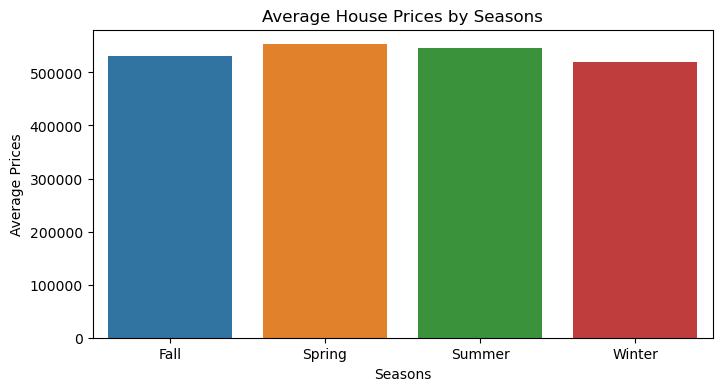

In [26]:
# check the average house prices by season
average_prices = relevant_data.groupby('season')['price'].mean().reset_index()

# Bar plot using Seaborn with average prices
plt.figure(figsize=(8, 4))
sns.barplot(x='season', y='price', data=average_prices)
plt.title('Average House Prices by Seasons')
plt.xlabel('Seasons')
plt.ylabel('Average Prices')
plt.savefig('house_grade.png', transparent=True)
plt.show()

Average house prices are highest during spring and slightly lower during winter.

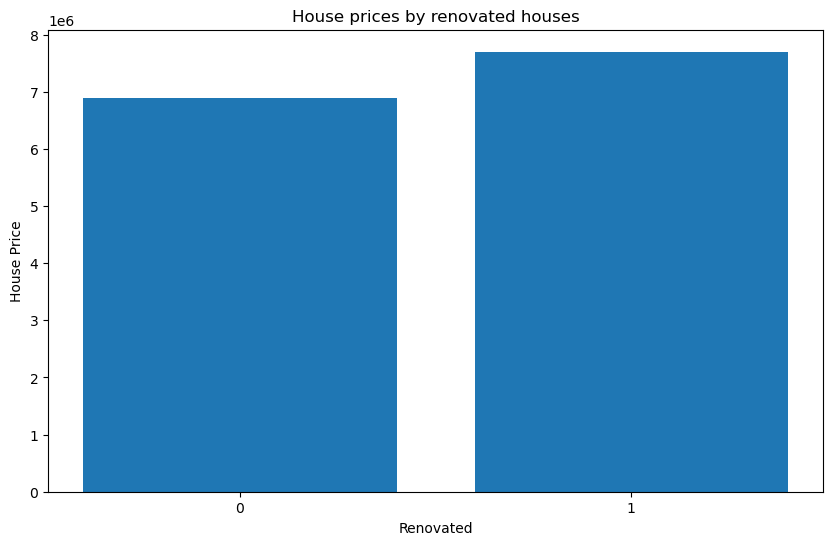

In [27]:
# checking the distribution of house prices by renovated houses
Renovated = relevant_data['renovated']
Price = relevant_data['price']
plt.figure(figsize=(10,6))
plt.bar(Renovated, Price)
plt.xlabel('Renovated')
plt.ylabel('House Price')
plt.title('House prices by renovated houses')
plt.xticks(ticks=[0, 1])
plt.show()

Renovated houses have a higher average price indicating renaovations had a small impact on the value of the house.

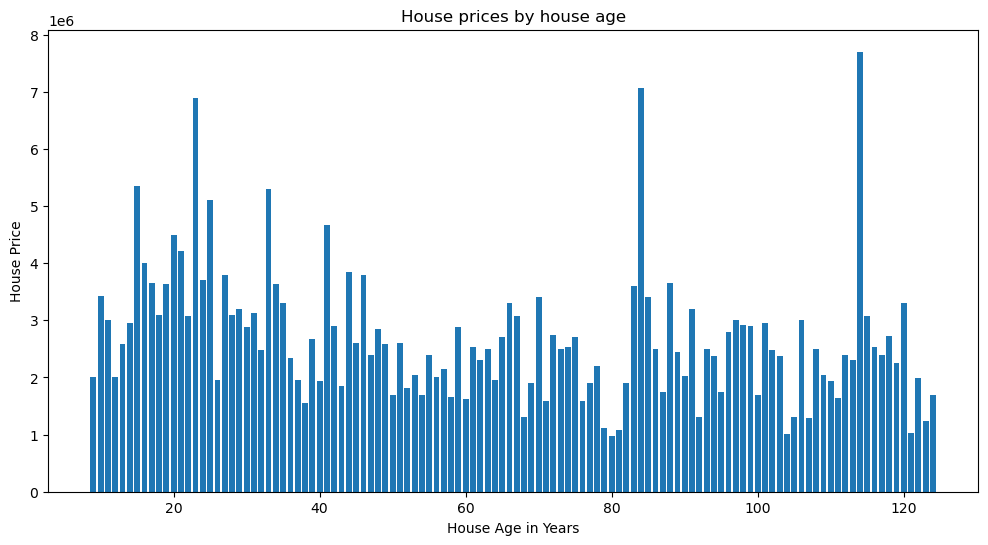

In [28]:
# Distribution of house price by age
House_age = relevant_data['house_age']
Price = relevant_data['price']
plt.figure(figsize=(12,6))
plt.bar(House_age, Price)
plt.xlabel('House Age in Years')
plt.ylabel('House Price')
plt.title('House prices by house age')

plt.show()

The houses are priced at 2 million dollars and above where the age is below 50 years. On the contrary majority of the houses over 50 years are priced below 2 million dollars.

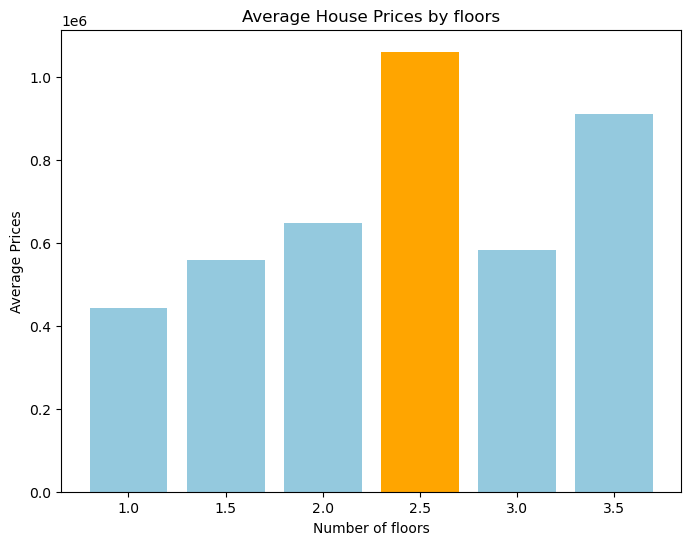

In [29]:
# Distribution of houses by floors
# Get the number of houses with each number of floors
average_prices = relevant_data.groupby('floors')['price'].mean().reset_index()

# Find the index of the maximum value
max_index = average_prices['price'].idxmax()

# Bar plot using Seaborn with average prices
plt.figure(figsize=(8, 6))
sns.barplot(x='floors', y='price', data=average_prices, color='skyblue')

# Highlight the bar with the maximum value
plt.bar(max_index, average_prices.loc[max_index, 'price'], color='orange')

plt.title('Average House Prices by floors')
plt.xlabel('Number of floors')
plt.ylabel('Average Prices')

plt.show()

Houses with 2.5 floors are the most priced at slightly above 1 million dollars and the least priced houses have 1 floor.

## Checking for outliers

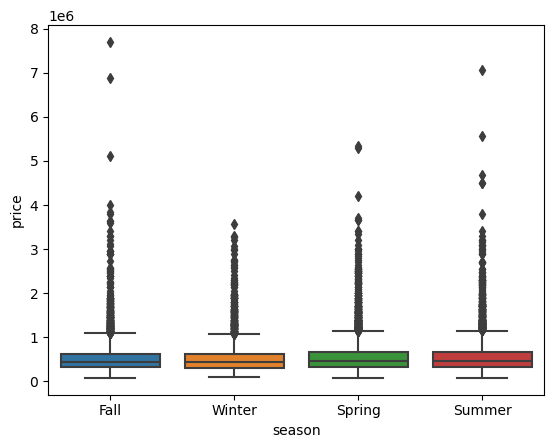

In [30]:
# seasons and price  
sns.boxplot(x='season', y='price', data=relevant_data)
plt.show()

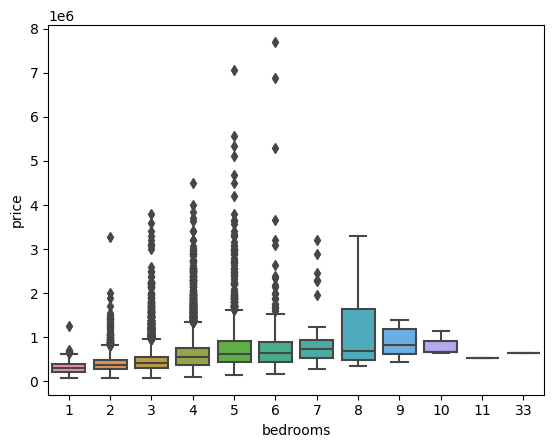

In [31]:
# bedrooms and price
sns.boxplot(x=relevant_data['bedrooms'], y=relevant_data['price'])
plt.show()

## Removing outliers using z-score

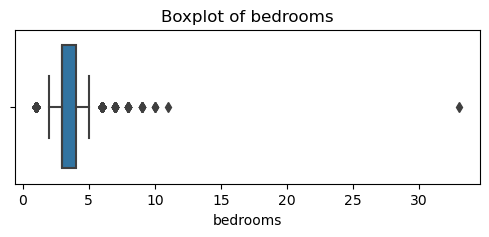

In [32]:
plt.figure(figsize=(6, 2))
sns.boxplot(x='bedrooms', data=relevant_data)
plt.title('Boxplot of bedrooms')
plt.show()

In [33]:
#removing outlier with '33' bedrooms
relevant_data=relevant_data[relevant_data['bedrooms']!=33]

In [34]:
# Calculate Z-score for 'price'
z_scores = stats.zscore(relevant_data['price'])
threshold = 3  # Define a threshold for extreme values (e.g., 3 standard deviations)

# Detect outliers
outliers = relevant_data['price'][np.abs(z_scores) > threshold]

# Remove outliers
relevant_data1 = relevant_data[np.abs(z_scores) <= threshold]

In [35]:
# Pairplot
# sns.pairplot(relevant_data)
# plt.show()

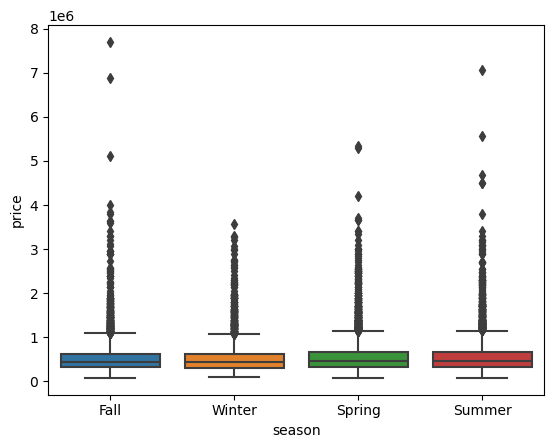

In [36]:
# seasons and price  
sns.boxplot(x='season', y='price', data=relevant_data)
plt.show()

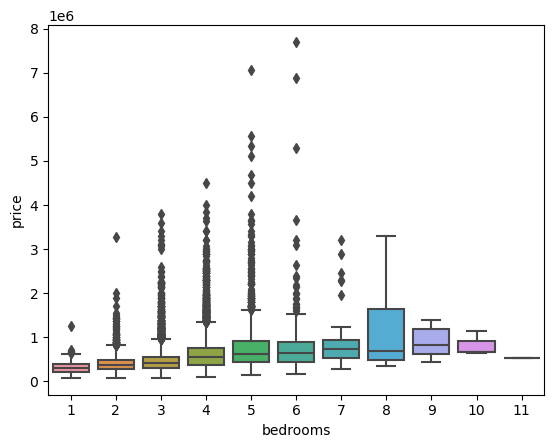

In [37]:
sns.boxplot(x='bedrooms', y='price', data=relevant_data)
plt.show()

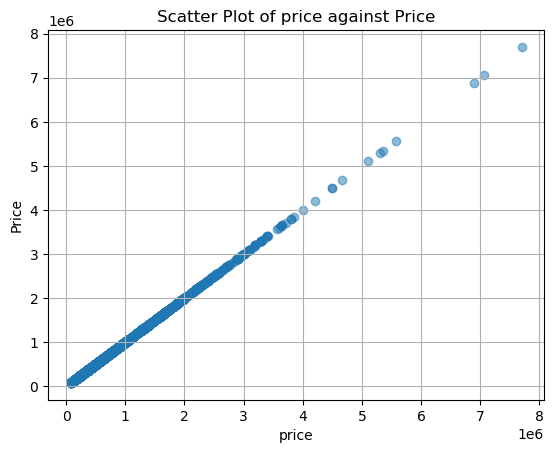

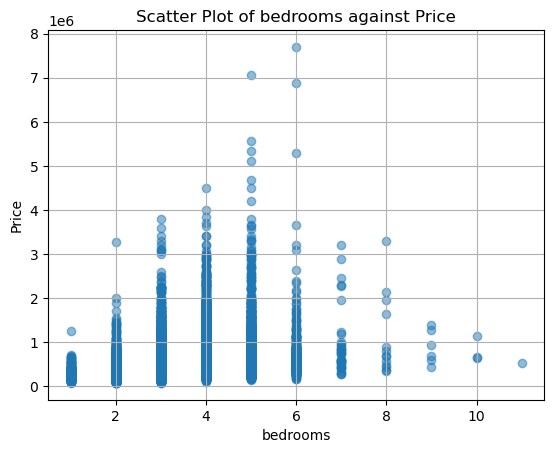

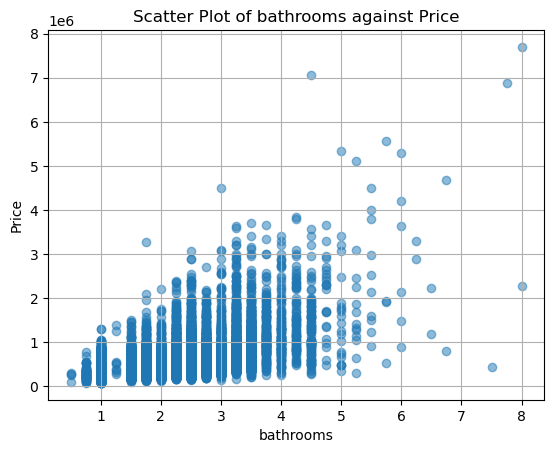

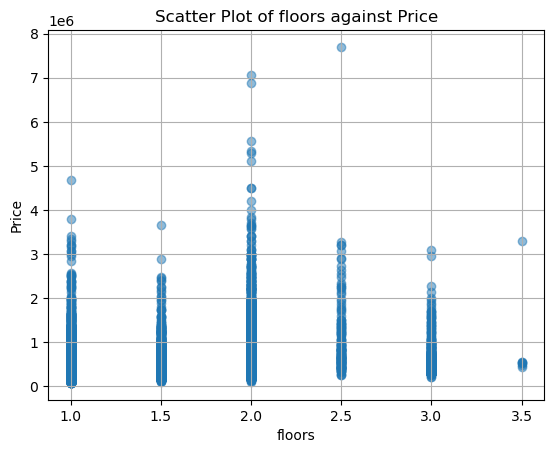

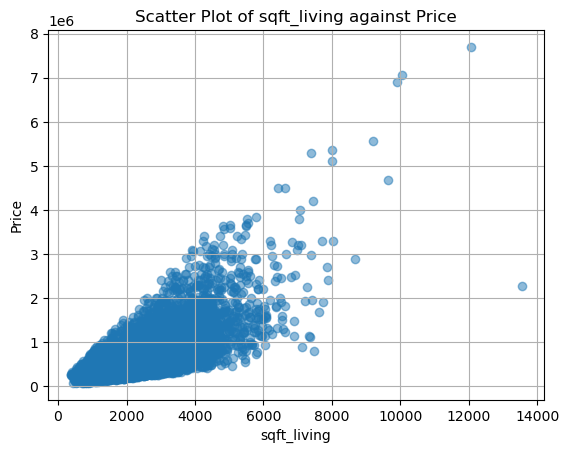

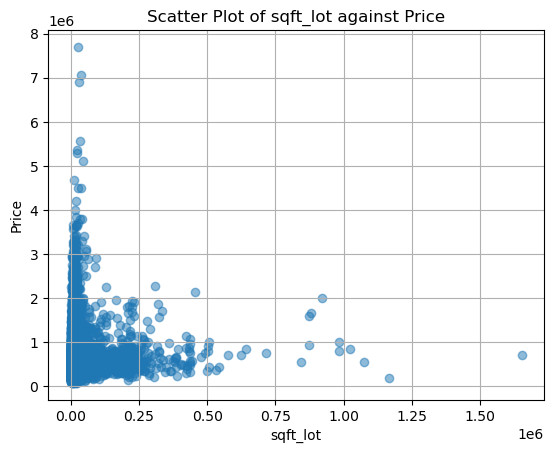

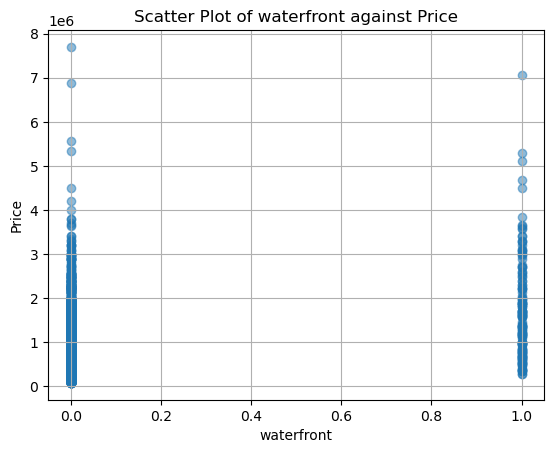

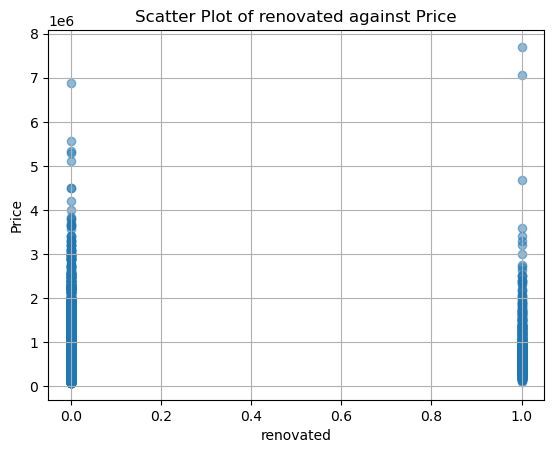

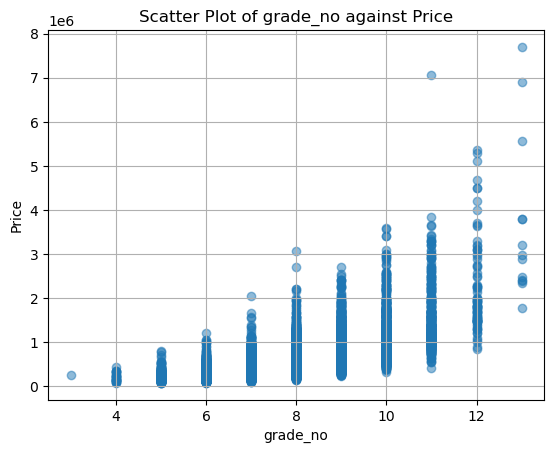

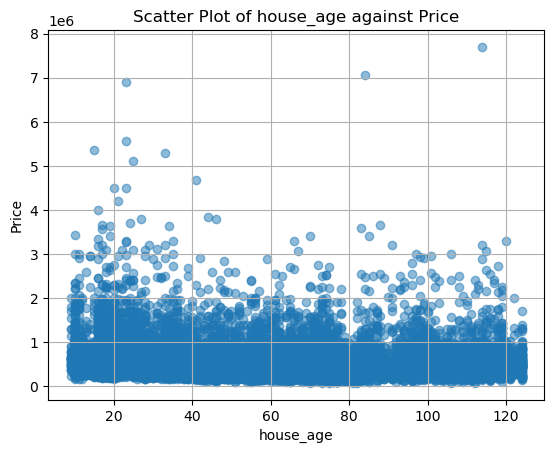

In [38]:
#create a scatter plot for the numeric columns to observe their relationship with price
numeric_columns = relevant_data.select_dtypes(include=['number'])

# Iterate through each numeric column and create scatter plots
for column in numeric_columns.columns:
    plt.scatter(relevant_data[column], relevant_data['price'], alpha=0.5)
    plt.title(f'Scatter Plot of {column} against Price')
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()

## Correlation

In [39]:
relevant_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21596 non-null  float64
 1   bedrooms     21596 non-null  int64  
 2   bathrooms    21596 non-null  float64
 3   floors       21596 non-null  float64
 4   sqft_living  21596 non-null  int64  
 5   sqft_lot     21596 non-null  int64  
 6   waterfront   21596 non-null  int64  
 7   renovated    21596 non-null  int32  
 8   season       21596 non-null  object 
 9   grade_no     21596 non-null  int64  
 10  house_age    21596 non-null  int64  
dtypes: float64(3), int32(1), int64(6), object(1)
memory usage: 1.9+ MB


In [40]:
numeric_df = relevant_data.select_dtypes(include=['float64', 'int64'])
corr_price = numeric_df.corr()['price'].sort_values()
corr_price

house_age     -0.053965
sqft_lot       0.089879
floors         0.256820
waterfront     0.264308
bedrooms       0.315961
bathrooms      0.525915
grade_no       0.667964
sqft_living    0.701929
price          1.000000
Name: price, dtype: float64

In [41]:
relevant_data.columns

Index(['price', 'bedrooms', 'bathrooms', 'floors', 'sqft_living', 'sqft_lot',
       'waterfront', 'renovated', 'season', 'grade_no', 'house_age'],
      dtype='object')

In [42]:
# Correlation table
cols = ['price', 'bedrooms', 'bathrooms', 'floors', 'sqft_living', 'sqft_lot',
       'waterfront', 'renovated', 'grade_no', 'house_age']
corr = relevant_data[cols].corr()
corr

,price,bedrooms,bathrooms,floors,sqft_living,sqft_lot,waterfront,renovated,grade_no,house_age
price,1.000000,0.315961,0.525915,0.256820,0.701929,0.089879,0.264308,0.117546,0.667964,-0.053965
bedrooms,0.315961,1.000000,0.527870,0.183707,0.593178,0.033602,-0.002054,0.018354,0.366174,-0.160736
bathrooms,0.525915,0.527870,1.000000,0.502574,0.755755,0.088368,0.063628,0.046738,0.665834,-0.507166
floors,0.256820,0.183707,0.502574,1.000000,0.353941,-0.004824,0.020794,0.003705,0.458783,-0.489175
sqft_living,0.701929,0.593178,0.755755,0.353941,1.000000,0.173449,0.104635,0.050825,0.762776,-0.318140
sqft_lot,0.089879,0.033602,0.088368,-0.004824,0.173449,1.000000,0.021458,0.005089,0.114726,-0.052939
waterfront,0.264308,-0.002054,0.063628,0.020794,0.104635,0.021458,1.000000,0.074267,0.082817,0.024491
renovated,0.117546,0.018354,0.046738,0.003705,0.050825,0.005089,0.074267,1.000000,0.015254,0.202848
grade_no,0.667964,0.366174,0.665834,0.458783,0.762776,0.114726,0.082817,0.015254,1.000000,-0.447854
house_age,-0.053965,-0.160736,-0.507166,-0.489175,-0.318140,-0.052939,0.024491,0.202848,-0.447854,1.000000


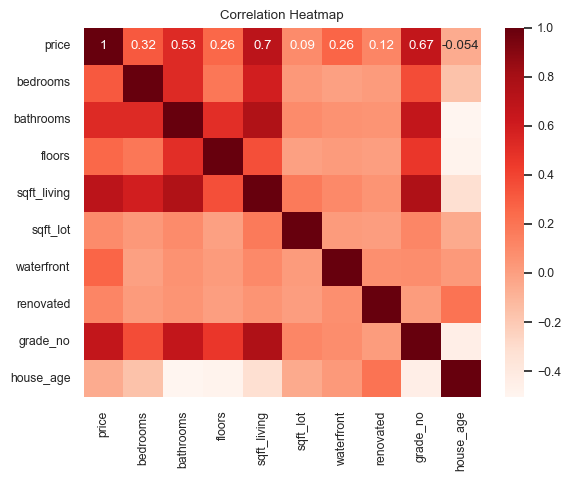

In [43]:
# heatmap with seaborn
sns.set(font_scale=0.8)
sns.heatmap(corr, annot=True, cmap='Reds')
plt.title("Correlation Heatmap")
plt.show()

- The strongest positive correlation (0.7) is between price and square footage of living area, indicating that larger homes tend to have higher prices.
- The second strongest positive correlation (0.67) is between price and the grade_no, suggesting that the higher the grade the higher the price.
- The third strongest positive correlation (0.32) is between price and number of bedrooms, implying that more bedrooms in a home also contribute to its price, but to a lesser extent than bathrooms.
- The weakest positive correlation (0.05) is between price and year built, meaning that newer homes have slightly higher prices than older homes, but the effect is negligible.
- Price and Year Renovated is only (0.12). Reasons could be:
    - Renovations might cater to personal preferences rather than broad market appeal.
    - Recent renovations might indicate potential underlying issues with the property.

## Modelling

In [44]:
import statsmodels.formula.api as sm

In [45]:
# To build a regression model we start with the baseline  model.
# This is a simple linear regression
# We start by assigning the dependent variable and the independent variable

y = relevant_data['price']
x_baseline = relevant_data[['sqft_living']]

In [46]:
# Build the simple linear regression model and display the results of the model 
import statsmodels.api as sm

baseline_model = sm.OLS(y, sm.add_constant(x_baseline))
baseline_results = baseline_model.fit()
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:44:56   Log-Likelihood:            -3.0005e+05
No. Observations:               21596   AIC:                         6.001e+05
Df Residuals:                   21594   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.401e+04   4410.123     -9.980      

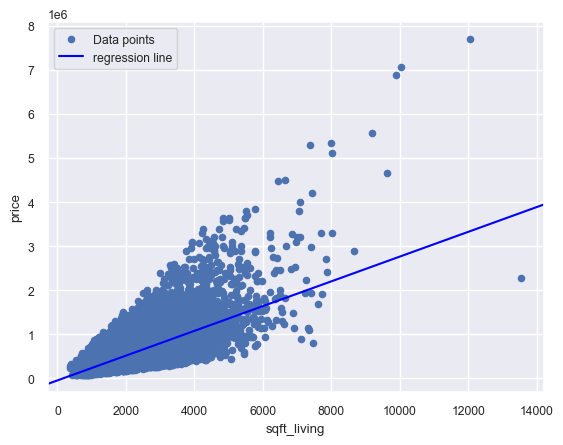

In [47]:
# Plot the scatter diagram and the best_fit regression line.

fig, ax = plt.subplots()
relevant_data.plot.scatter(x = 'sqft_living', y = 'price', label = 'Data points', ax = ax)
sm.graphics.abline_plot(model_results = baseline_results, label = 'regression line', ax = ax, color = 'blue')
ax.legend();

## Intepretation of the Baseline model
* The R squared of the model is 0.49 interpreted as the propotional extent to which independent variable, Squarefoot of living area, explains the change in price.
* The probability of the F Statistic is well below the alpha value of 0.05 which shows that model is stastically significant.
* The coefficients of the model (const (which is the y intercept) and the sqft_living) are both statistically significant with
a p value well below 0.05.
* For each increase in sqft_living we see a corresponding increase of 281 in price.

### Building a Multiple regression Model

In [48]:
relevant_data.columns

Index(['price', 'bedrooms', 'bathrooms', 'floors', 'sqft_living', 'sqft_lot',
       'waterfront', 'renovated', 'season', 'grade_no', 'house_age'],
      dtype='object')

In [49]:
y = relevant_data['price']
x_baseline = relevant_data[['grade_no','sqft_living','bathrooms','renovated', 'house_age']]

In [50]:
# Build the simple linear regression model and display the results of the model 
import statsmodels.api as sm


baseline_model = sm.OLS(y, sm.add_constant(x_baseline))
baseline_results = baseline_model.fit()
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     6672.
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:44:58   Log-Likelihood:            -2.9729e+05
No. Observations:               21596   AIC:                         5.946e+05
Df Residuals:                   21590   BIC:                         5.946e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.166e+06   1.55e+04    -75.151      

In [51]:
y = relevant_data['price']
x_baseline = relevant_data[['bedrooms', 'bathrooms', 'floors', 'sqft_living', 'sqft_lot',
       'waterfront', 'renovated','grade_no', 'house_age']]

In [52]:
# Build the simple linear regression model and display the results of the model 
baseline_model = sm.OLS(y, sm.add_constant(x_baseline))
baseline_results = baseline_model.fit()
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     4368.
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:44:58   Log-Likelihood:            -2.9618e+05
No. Observations:               21596   AIC:                         5.924e+05
Df Residuals:                   21586   BIC:                         5.925e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.017e+06   1.61e+04    -63.270      

## Interpretation of results
- R-squared: 0.646
Indicates that the model explains 64.6 % of the variance in the dependent variable (price).
<br/>
- Adj. R-squared: 0.645
Similar to R-squared but adjusts for the number of predictors in the model.
<br/>
- Prob (F-statistic): 0.00
The probability associated with the F-statistic, suggesting the overall significance of the model.
<br/>
- Coefficients:
Each predictor variable's coefficient represents the change in the dependent variable (price) per unit change in that predictor, holding other predictors constant.

    - Intercept (const): -1.017e+06
    - bedrooms: -4.573e+04
    - bathrooms: 5.282e+04
    - floors: 1.692e+04
    - sqft_living: 179.8298
    - sqft_lot: -0.2495
    - waterfront: 7.512e+05
    - renovated: 1.759e+04
    - grade_no: 1.291e+05
    - house_age: 3957.4099
    
    <br/>
- Statistical Significance (P-values):
P>|t| values for each coefficient indicate the probability of observing the data if the null hypothesis (that the coefficient is zero) is true.
<br/>
- Variables with a P-value less than a significance level (commonly 0.05) are typically considered statistically significant. For instance, bathrooms, floors, sqft_living, sqft_lot, waterfront, renovated, grade_no, house_age,seem significant since their P-values are 0.000.

## Recomendations

Our potential homeowners are advised to focus on the variables on the final model when looking for competitively priced homes. These are majorly square feet of the living space, bathrooms and bedrooms. Where one is looking to buy a home at favorable prices a potential homeowner will need to compromise on one or two items. e.g. waterfront homes or square feet of living area.Our stakeholders are advised to purchase homes in the spring or summer in order to get a good variety of homes to pick from.
Further Data Collection: Explore additional data beyond the current predictors to refine the model. Factors like proximity to amenities, neighborhood trends, or specific architectural styles could further enhance price prediction accuracy.